In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib  # For saving the model

### Load DATA

In [10]:
pd.set_option('display.max_columns', None)

# Load the data
csv_file_path = os.path.join('..', 'Data', 'csv_file', 'combined_data', 'PTS_training.csv')
train_data = pd.read_csv(csv_file_path)
print(train_data.columns.tolist())
train_data.tail()

['PLAYER_NAME', 'PLAYER_ID', 'MATCHUP', 'TEAM', 'TEAM_ID', 'OPPONENT', 'GAME_ID', 'GAME_DATE', 'WL', 'MIN', 'PTS', 'AST', 'REB', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'FANTASY_PTS', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'USG_PCT', 'TS_PCT', 'E_PACE', 'TEAM_MIN', 'TEAM_FGM', 'TEAM_FGA', 'TEAM_FG_PCT', 'TEAM_FG3M', 'TEAM_FG3A', 'TEAM_FG3_PCT', 'TEAM_FTM', 'TEAM_FTA', 'TEAM_FT_PCT', 'TEAM_OREB', 'TEAM_DREB', 'TEAM_REB', 'TEAM_AST', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF', 'TEAM_PTS', 'OPP_DEF_RATING', 'OPP_STL', 'OPP_BLK', 'OPP_REB', 'OPP_TEAM_ID', 'TEAM_OFF_RATING', 'TEAM_PACE', 'GAME_PACE', 'OPP_PACE', 'PER', 'HOME_GAME', 'USG_PCT_LAST_5', 'USG_DRTG_INTERACTION', 'USG_PCT_LAST_3', 'PTS_LAST_3', 'PTS_LAST_5', 'PTS_LAST_7', 'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS']


,PLAYER_NAME,PLAYER_ID,MATCHUP,TEAM,TEAM_ID,OPPONENT,GAME_ID,GAME_DATE,WL,MIN,PTS,AST,REB,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,STL,BLK,TOV,PF,PLUS_MINUS,FANTASY_PTS,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TOV,USG_PCT,TS_PCT,E_PACE,TEAM_MIN,TEAM_FGM,TEAM_FGA,TEAM_FG_PCT,TEAM_FG3M,TEAM_FG3A,TEAM_FG3_PCT,TEAM_FTM,TEAM_FTA,TEAM_FT_PCT,TEAM_OREB,TEAM_DREB,TEAM_REB,TEAM_AST,TEAM_STL,TEAM_BLK,TEAM_TOV,TEAM_PF,TEAM_PTS,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_TEAM_ID,TEAM_OFF_RATING,TEAM_PACE,GAME_PACE,OPP_PACE,PER,HOME_GAME,USG_PCT_LAST_5,USG_DRTG_INTERACTION,USG_PCT_LAST_3,PTS_LAST_3,PTS_LAST_5,PTS_LAST_7,PLAYER_HOME_AVG_PTS,PLAYER_AWAY_AVG_PTS
97376,Xavier Cooks,1641645,WAS @ NYK,WAS,1610612764,NYK,22201168,2023-04-02,L,4.0,0,1,1,0,0,NaN,0,0,NaN,0,0,NaN,0,1,0,1,0,1,9,5.7,166.7,66.7,100.0,0.167,0.0,0.000,0.000,121.21,240,39,79,0.494,16,37,0.432,15,18,0.833,5,33,38,26,9,5,18,18,109,109.087270,12.0,4.0,39.0,1.610613e+09,109.087270,99.92,99.92,99.92,26.918250,0,0.0952,0.000000,0.158667,1.333333,0.8,0.666667,NaN,0.0
97377,Xavier Cooks,1641645,WAS vs. MIL,WAS,1610612764,MIL,22201179,2023-04-04,L,26.0,8,1,2,4,5,0.800,0,0,NaN,0,0,NaN,0,2,0,0,2,3,5,9.9,133.3,123.0,10.4,0.040,0.5,0.108,0.800,111.49,240,50,99,0.505,13,27,0.481,15,21,0.714,9,33,42,30,7,4,9,21,128,118.255728,6.0,7.0,56.0,1.610613e+09,118.255728,108.24,109.50,110.76,13.926000,1,0.1168,12.771619,0.083667,3.333333,2.4,1.714286,2.400000,NaN
97378,Xavier Cooks,1641645,WAS @ ATL,WAS,1610612764,ATL,22201191,2023-04-05,L,17.0,6,3,6,2,5,0.400,0,0,NaN,2,2,1.000,2,4,1,1,1,3,2,22.7,112.5,107.5,5.0,0.188,3.0,0.159,0.510,111.85,240,45,94,0.479,6,28,0.214,20,26,0.769,12,27,39,23,10,9,14,26,116,107.967238,10.0,5.0,48.0,1.610613e+09,107.967238,107.44,106.52,105.60,38.184235,0,0.1486,17.166791,0.089000,4.666667,3.6,2.571429,NaN,2.0
97379,Xavier Cooks,1641645,WAS vs. MIA,WAS,1610612764,MIA,22201204,2023-04-07,W,22.0,10,0,9,4,5,0.800,0,1,0.0,2,6,0.333,4,5,3,0,1,3,-22,28.8,84.9,128.8,-43.9,0.000,0.0,0.145,0.654,115.07,240,39,84,0.464,7,33,0.212,29,37,0.784,12,38,50,23,4,3,16,18,114,109.321059,7.0,4.0,47.0,1.610613e+09,109.321059,104.28,104.78,105.28,40.381273,1,0.1110,15.851554,0.137333,8.000000,5.2,4.000000,3.666667,NaN
97380,Xavier Cooks,1641645,WAS vs. HOU,WAS,1610612764,HOU,22201222,2023-04-09,L,38.0,10,0,14,5,11,0.455,0,0,NaN,0,2,0.000,7,7,2,2,1,2,3,37.8,112.3,106.0,6.3,0.000,0.0,0.138,0.421,101.35,240,41,97,0.423,14,45,0.311,13,21,0.619,14,37,51,28,11,5,12,21,109,104.566385,8.0,6.0,51.0,1.610613e+09,104.566385,104.24,104.28,104.32,29.906368,1,0.1100,14.430161,0.147333,8.666667,6.8,5.428571,4.571429,NaN


In [35]:
features = [
    'MIN','PTS_LAST_3', 'PTS_LAST_5', 'FG_PCT','FG3_PCT', 'FT_PCT',
    'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS', 'TS_PCT',
    'USG_PCT_LAST_5', 'OFF_RATING', 'TEAM_PACE','OPP_DEF_RATING', 
    'OPP_PACE','HOME_GAME'
]

X_train = train_data[features]
y_train = train_data['PTS']

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.3,random_state=0)

# Initialize and train the XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Evaluate the model using cross-validation on the training data
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")

# Load the test data (2024)
test_csv_file_path = os.path.join('..', 'Data', 'csv_file', '2024', 'players_PTS_df_2024.csv')
test_data = pd.read_csv(test_csv_file_path)

# Ensure the test data has the same features
X_test = test_data[features]
y_test = test_data['PTS']

# Make predictions on the 2024 data
pred = xgb_model.predict(X_test)

# Evaluate the model's performance on the 2024 data
rmse_2024 = np.sqrt(mean_squared_error(y_test, pred))
r2_2024 = r2_score(y_test, pred)
print(f"2024 Season RMSE: {rmse_2024:.4f}, R²: {r2_2024:.4f}")

# Add predictions to the 2024 data for comparison
test_data['actual'] = y_test
test_data['predicted'] = pred
test_data['error'] = abs(y_test-pred).round(3)


Cross-validated RMSE: 2.3976 ± 0.0239
2024 Season RMSE: 2.3956, R²: 0.9289


In [44]:
test_result = test_data[['PLAYER_NAME','actual','predicted','error']]
# player = test_result[test_result['PLAYER_NAME']=='Luka Doncic']
#i want the percent of the time the actual is greater than the predicted
test_result[test_result['actual'] < test_result['predicted']].count() / test_result.shape[0]



PLAYER_NAME    0.543767
actual         0.543767
predicted      0.543767
error          0.543767
dtype: float64

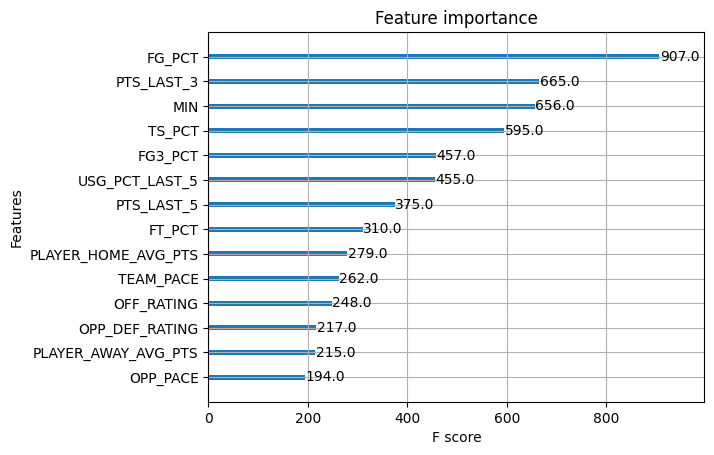

In [46]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model)
plt.show()


In [6]:
# joblib.dump(xgb_model_reb, 'xgb_model_ast.pkl')

['xgb_model_ast.pkl']